## Question A:
Euler's

Euler settling time (±0.1 m):
  450 kg  =  0.390 s
  563 kg  =  0.488 s


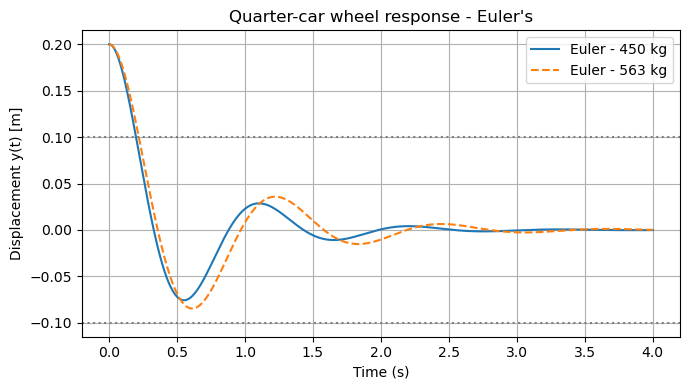

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k, c = 16_000.0, 1_600.0
M_base = 450.0
M_heavy = 450.0 + 113.4
y0, v0 = 0.20, 0.0
t_end, h = 4.0, 0.001
tol = 0.10

def accel(y, v, M):
    return -(c*v + k*y) / M

def euler_step(y, v, h, M):
    y_next = y + h*v
    v_next = v + h*accel(y, v, M)
    return y_next, v_next

def simulate(M):
    n = int(np.ceil(t_end / h))
    t = np.linspace(0, n*h, n+1)
    y = np.empty_like(t); v = np.empty_like(t)
    y[0], v[0] = y0, v0
    for i in range(1, n+1):
        y[i], v[i] = euler_step(y[i-1], v[i-1], h, M)
    return t, y

def settling_time(t, y, band=0.10):
    mask = np.abs(y) <= band
    for i in range(len(mask)):
        if mask[i] and mask[i:].all():
            return t[i]
    return np.nan

# Simulations
t_b, y_b = simulate(M_base)
t_h, y_h = simulate(M_heavy)

# Settling times
ts_b = settling_time(t_b, y_b, tol)
ts_h = settling_time(t_h, y_h, tol)

# Print results
print(f"Euler (simulated) settling time (±{tol} m):")
print(f"  450 kg  =  {ts_b:.3f} s")
print(f"  563 kg  =  {ts_h:.3f} s")

# Plot
plt.figure(figsize=(7, 4))
plt.plot(t_b, y_b, label="Euler - 450 kg")
plt.plot(t_h, y_h, "--", label="Euler - 563 kg")
plt.axhline( tol, color="gray", linestyle=":")
plt.axhline(-tol, color="gray", linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Displacement y(t) [m]")
plt.title("Quarter-car wheel response - Euler's")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

RK-4

RK4 settling time (±0.1 m):
  450 kg  =  0.390 s
  563 kg  =  0.488 s


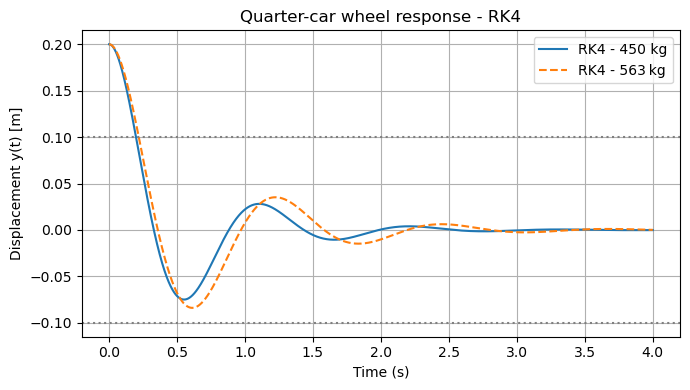

In [ ]:
# Parameters
k, c = 16_000.0, 1_600.0
M_base = 450.0
M_heavy = 450.0 + 113.4
y0, v0 = 0.20, 0.0
t_end, h = 4.0, 0.001
tol = 0.10

def accel(y, v, M):
    return -(c*v + k*y) / M

def rk4_step(y, v, h, M):
    k1y, k1v = v, accel(y, v, M)
    k2y, k2v = v + 0.5*h*k1v, accel(y + 0.5*h*k1y, v + 0.5*h*k1v, M)
    k3y, k3v = v + 0.5*h*k2v, accel(y + 0.5*h*k2y, v + 0.5*h*k2v, M)
    k4y, k4v = v + h*k3v, accel(y + h*k3y,v + h*k3v,M)
    y_next = y + (h/6)*(k1y + 2*k2y + 2*k3y + k4y)
    v_next = v + (h/6)*(k1v + 2*k2v + 2*k3v + k4v)
    return y_next, v_next

def simulate(M):
    n = int(np.ceil(t_end / h))
    t = np.linspace(0, n*h, n+1)
    y = np.empty_like(t); v = np.empty_like(t)
    y[0], v[0] = y0, v0
    for i in range(1, n+1):
        y[i], v[i] = rk4_step(y[i-1], v[i-1], h, M)
    return t, y

def settling_time(M, y0=0.20, band=0.10):
    alpha = c / (2 * M)
    return np.log(y0 / band) / alpha

# Sims
t_b, y_b = simulate(M_base)
t_h, y_h = simulate(M_heavy)

# Setttling time
t_env_b = settling_time(M_base, y0, tol)
t_env_h = settling_time(M_heavy, y0, tol)

print(f"RK4 settling time (±{tol} m):")
print(f"  450 kg  =  {t_env_b:.3f} s")
print(f"  563 kg  =  {t_env_h:.3f} s")

# Plots
plt.figure(figsize=(7, 4))
plt.plot(t_b, y_b, label="RK4 - 450 kg")
plt.plot(t_h, y_h, "--", label="RK4 - 563 kg")
plt.axhline( tol, color="gray", linestyle=":")
plt.axhline(-tol, color="gray", linestyle=":")
plt.xlabel("Time (s)")
plt.ylabel("Displacement y(t) [m]")
plt.title("Quarter-car wheel response - RK4")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()